In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier  # if regression then BaggingRegressor
from sklearn.ensemble import RandomForestClassifier  # if regression then RandomForestRegressor

from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [2]:
# import dataset for model building
dataset = pd.read_csv('Dataset/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# preprocession
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
for i in dataset.columns:
    print(f"***********{i}*******************")
    print()
    print(set(dataset[i].tolist()))
    print()

***********Pregnancies*******************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17}

***********Glucose*******************

{0, 44, 56, 57, 61, 62, 65, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199}

***********BloodPressure*******************

{0, 24, 30, 38, 40, 44, 46, 48, 50, 52, 54, 55, 56, 58, 60, 61, 62, 64, 65, 66, 68, 70, 72, 74, 75, 76, 78, 80, 82, 84, 85, 86, 88, 90, 92, 94, 95, 96, 98, 100, 102, 104,

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


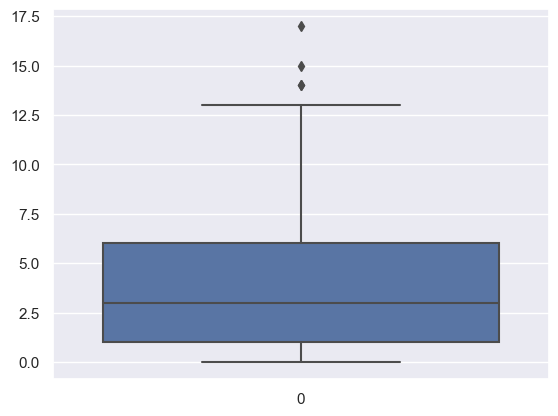

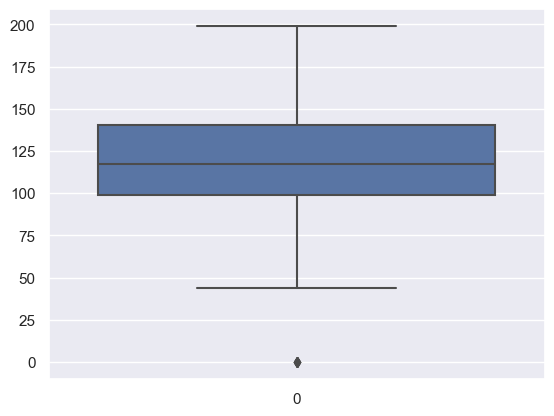

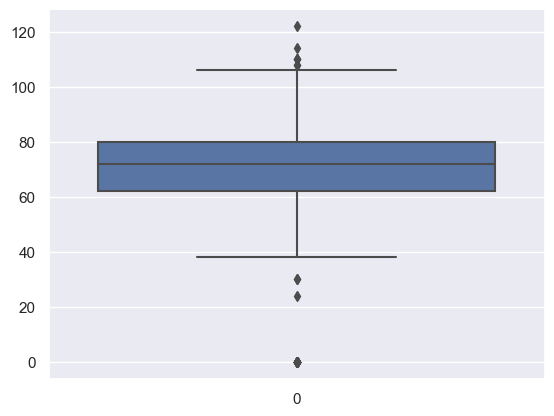

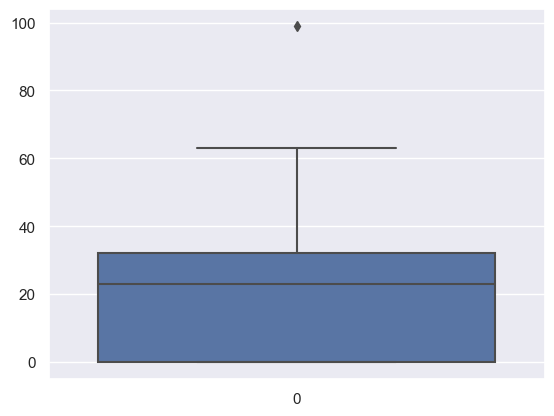

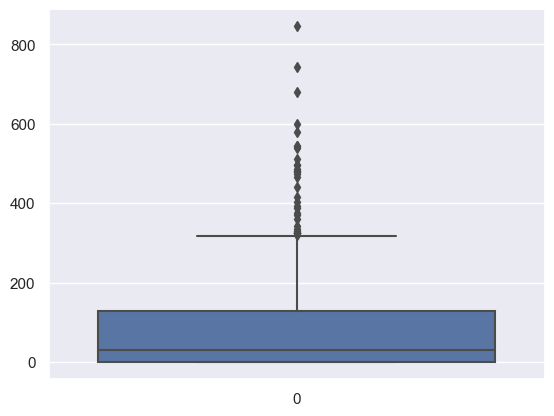

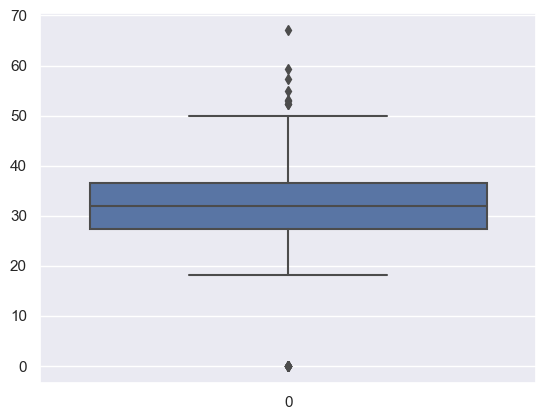

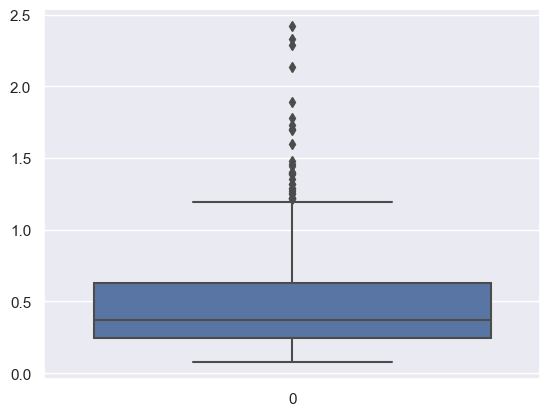

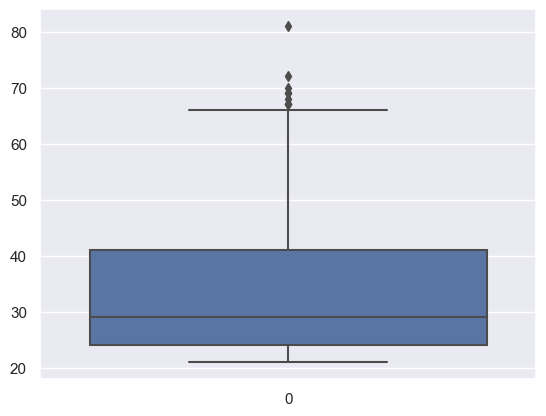

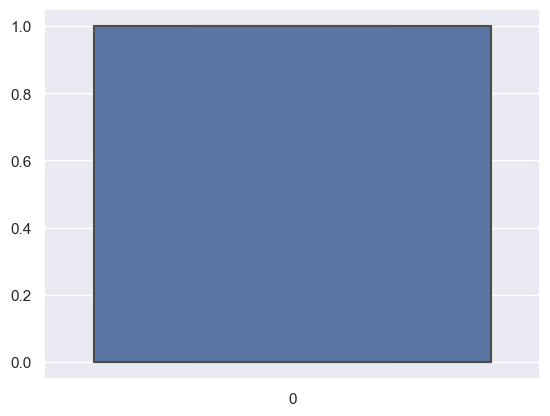

In [7]:
def boxplot(col):
    sns.boxplot(dataset[col])
    plt.show()
for i in list(dataset.select_dtypes(exclude = ['object']).columns)[0:]:
    boxplot(i)

In [8]:
dataset['Glucose'] = np.where(dataset['Glucose'] == 0 , dataset['Glucose'].median() , dataset['Glucose'])
dataset['BloodPressure'] = np.where(dataset['BloodPressure'] == 0 , dataset['BloodPressure'].median() , dataset['BloodPressure'])
dataset['SkinThickness'] = np.where(dataset['SkinThickness'] == 0 , dataset['SkinThickness'].median() , dataset['SkinThickness'])
dataset['Insulin'] = np.where(dataset['Insulin'] == 0 , dataset['Insulin'].median() , dataset['Insulin'])
dataset['BMI'] = np.where(dataset['BMI'] == 0 , dataset['BMI'].median() , dataset['BMI'])

In [9]:
for i in dataset.columns:
    print(f"***********{i}*******************")
    print()
    print(set(dataset[i].tolist()))
    print()

***********Pregnancies*******************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17}

***********Glucose*******************

{44.0, 56.0, 57.0, 61.0, 62.0, 65.0, 67.0, 68.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 186.0, 187.0, 188.0, 189.0, 190.0, 191.0

In [10]:
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
# split the data into independent and dependent variable
x = dataset.drop(columns = ['Outcome'])
y = dataset[['Outcome']]

In [12]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [13]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [14]:
# balance the data by using smote techniques

import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote , y_smote = smote.fit_resample(x,y)
print('before smote ' , y.value_counts())
print()
print('after smote ' , y_smote.value_counts())

before smote  Outcome
0          500
1          268
Name: count, dtype: int64

after smote  Outcome
0          500
1          500
Name: count, dtype: int64


In [15]:
# split the data into train and test
x_train , x_test , y_train , y_test = train_test_split(x_smote , y_smote , test_size = 0.25 , random_state = 1 , stratify = y_smote)

# Bagging classifier model

In [16]:
bagging = BaggingClassifier()
bagging.fit(x_train , y_train)

BaggingClassifier()

In [17]:
y_predict_train = bagging.predict(x_train)

In [18]:
y_pred_train = bagging.predict(x_test)

In [19]:
# Evaluate the model
print(classification_report(y_train , y_predict_train))
print(classification_report(y_test , y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       375
           1       0.99      0.98      0.99       375

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       125
           1       0.76      0.73      0.75       125

    accuracy                           0.75       250
   macro avg       0.75      0.75      0.75       250
weighted avg       0.75      0.75      0.75       250



In [20]:
print(accuracy_score(y_train , y_predict_train))
print(accuracy_score(y_test , y_pred_train))

0.988
0.752


In [21]:
bagg_accuracy = accuracy_score(y_test , y_pred_train)

In [22]:
from sklearn.tree import plot_tree

In [23]:
bagging.estimators_ # 10 trees are there

[DecisionTreeClassifier(random_state=1008249848),
 DecisionTreeClassifier(random_state=602808600),
 DecisionTreeClassifier(random_state=1709331101),
 DecisionTreeClassifier(random_state=1331200628),
 DecisionTreeClassifier(random_state=1340453845),
 DecisionTreeClassifier(random_state=1053524169),
 DecisionTreeClassifier(random_state=1820890222),
 DecisionTreeClassifier(random_state=805572716),
 DecisionTreeClassifier(random_state=2017486716),
 DecisionTreeClassifier(random_state=64854941)]

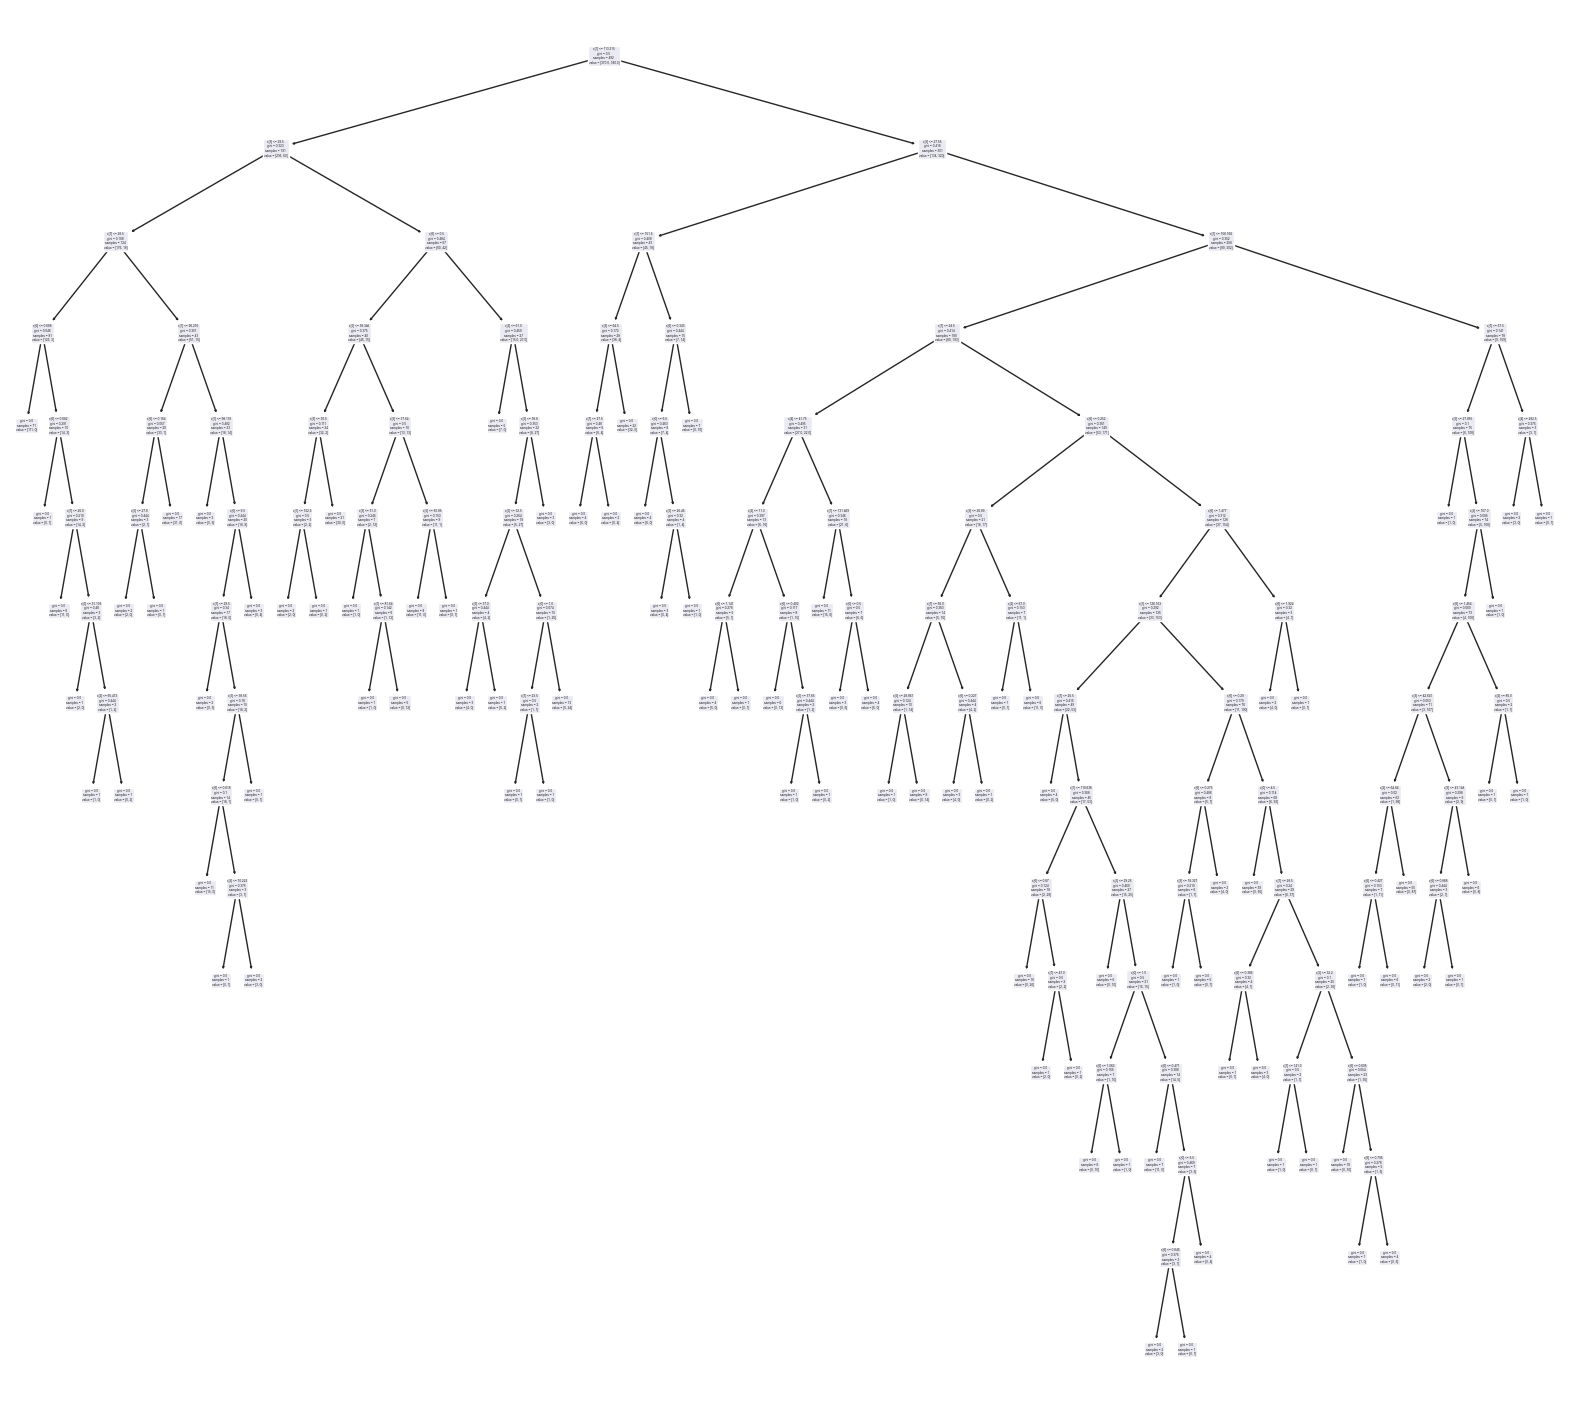

In [24]:
plt.figure(figsize = (20,18))
plot_tree(bagging.estimators_[0])
plt.show()

# RandomForest Classifier

In [25]:
rf = RandomForestClassifier(criterion='entropy' , max_features=2 ,max_depth=3 , oob_score = True)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=2,
                       oob_score=True)

In [26]:
y_predict_rf_train = rf.predict(x_train)
y_predict_rf_test = rf.predict(x_test)

In [27]:
rf.feature_importances_ # only 3 freature are high so we can take depth = 3

array([0.0307558 , 0.37186954, 0.03897086, 0.0419579 , 0.04771477,
       0.21903887, 0.08000432, 0.16968793])

In [28]:
# Evaluate the model
print(classification_report(y_train , y_predict_rf_train))
print(classification_report(y_test , y_predict_rf_test))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       375
           1       0.81      0.85      0.83       375

    accuracy                           0.82       750
   macro avg       0.82      0.82      0.82       750
weighted avg       0.82      0.82      0.82       750

              precision    recall  f1-score   support

           0       0.76      0.71      0.74       125
           1       0.73      0.78      0.75       125

    accuracy                           0.74       250
   macro avg       0.75      0.74      0.74       250
weighted avg       0.75      0.74      0.74       250



In [29]:
print(accuracy_score(y_train , y_predict_rf_train))
print(accuracy_score(y_test , y_predict_rf_test))

0.8226666666666667
0.744


In [30]:
rf_accuracy = accuracy_score(y_test , y_predict_rf_test)

# Try different prarmeter for in the model to imporve the accuracy score
# if not working out use cross validation

# cross validation`

In [31]:
from sklearn.model_selection import cross_val_score
test_accuracy = cross_val_score(rf , x_test , y_test , cv = 10)

In [32]:
test_accuracy

array([0.64, 0.8 , 0.84, 0.6 , 0.84, 0.76, 0.76, 0.64, 0.76, 0.72])

In [33]:
print('test mean accuracy' , test_accuracy.mean())
print('test max accuracy' , test_accuracy.max())

test mean accuracy 0.736
test max accuracy 0.84


# Approach no 2 

In [34]:
# Building model with scaled data
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)

In [36]:
sc_x

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29849289,
        -0.47378505, -0.87137393]])

In [37]:
# split the data into train and test
x_train , x_test , y_train , y_test = train_test_split(sc_x , y , test_size = 0.25 , random_state = 2 , stratify = y)

In [38]:
rf2 = RandomForestClassifier(criterion='gini' ,max_depth=4 , max_features = 4)
rf2.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, max_features=4)

In [39]:
y_predict_rf2_train = rf2.predict(x_train)
y_predict_rf2_test = rf2.predict(x_test)

In [40]:
# Evaluate the model
print(classification_report(y_train , y_predict_rf2_train))
print(classification_report(y_test , y_predict_rf2_test))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       375
           1       0.80      0.71      0.75       201

    accuracy                           0.84       576
   macro avg       0.82      0.81      0.81       576
weighted avg       0.83      0.84      0.83       576

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       125
           1       0.66      0.52      0.58        67

    accuracy                           0.74       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.73      0.74      0.73       192



In [41]:
print(accuracy_score(y_train , y_predict_rf2_train))
print(accuracy_score(y_test , y_predict_rf2_test))

0.8350694444444444
0.7395833333333334


In [42]:
test_accuracy = cross_val_score(rf2 , x_test , y_test , cv = 10)
print(test_accuracy)
print('test mean accuracy' , test_accuracy.mean())
print('test max accuracy' , test_accuracy.max())

[0.6        0.8        0.68421053 0.78947368 0.78947368 0.73684211
 0.84210526 0.73684211 0.68421053 0.68421053]
test mean accuracy 0.7347368421052631
test max accuracy 0.8421052631578947


# Voting method

# Logestic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train , y_train)

LogisticRegression()

In [44]:
y_predict_logit_train = logit.predict(x_train)
y_predict_logit_test = logit.predict(x_test)

In [45]:
print(accuracy_score(y_train , y_predict_logit_train))
print(accuracy_score(y_test , y_predict_logit_test))

0.7847222222222222
0.7552083333333334


In [46]:
logit_accuracy = accuracy_score(y_test , y_predict_logit_test)

# Decission Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train , y_train)

DecisionTreeClassifier()

In [48]:
y_predict_dtree_train = dtree.predict(x_train)
y_predict_dtree_test = dtree.predict(x_test)

In [49]:
print(accuracy_score(y_train , y_predict_dtree_train))
print(accuracy_score(y_test , y_predict_dtree_test))

1.0
0.65625


# Voting  Ensemble Method

In [50]:
from sklearn.ensemble import VotingClassifier

In [51]:
evc = VotingClassifier(estimators = [('bagging' , bagging) , ('rforest' , rf2) , ('logit' , logit) , ('dtree' , dtree)] , voting = 'soft')

In [52]:
model_evc = evc.fit(x_train , y_train)

In [53]:
y_predict_evc_train = model_evc.predict(x_train)
y_predict_evc_test = model_evc.predict(x_test)

In [54]:
print(accuracy_score(y_train , y_predict_evc_train))
print(accuracy_score(y_test , y_predict_evc_test))

0.9861111111111112
0.7395833333333334


In [55]:
voting_accuracy = accuracy_score(y_test , y_predict_evc_test)

In [57]:
print(bagg_accuracy)
print(rf_accuracy)
print(logit_accuracy)
print(voting_accuracy)

0.752
0.744
0.7552083333333334
0.7395833333333334


In [62]:
list1 = ['Bagging' , 'RandomForest' , 'Logestic' , 'Voting']
list2 = [bagg_accuracy , rf_accuracy , logit_accuracy , voting_accuracy]

In [63]:
final_accuracy = pd.DataFrame({'Accuracy' : list1 , 'Score' : list2})
final_accuracy

,Accuracy,Score
0,Bagging,0.752000
1,RandomForest,0.744000
2,Logestic,0.755208
3,Voting,0.739583


<AxesSubplot:xlabel='Accuracy', ylabel='Score'>

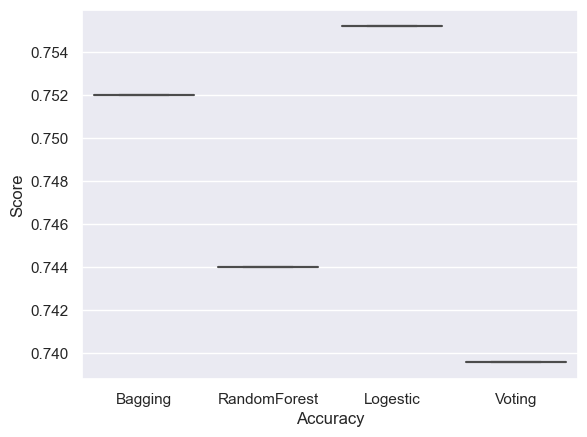

In [68]:
sns.boxplot(x = 'Accuracy' , y = 'Score' , data = final_accuracy)